In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader =  DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

print('Train data:', len(train_data))
print('Test data:', len(test_data))

Train data: 60000
Test data: 10000


In [3]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28),
            torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = AE()

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [5]:
num_epochs = 10
outputs = []
losses = []

for epoch in range(num_epochs):
    for (img, _) in train_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = loss_function(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss.item()}')
    outputs.append((epoch, img, recon))
    losses.append(loss)
    


Epoch:1, Loss:0.03039519488811493
Epoch:2, Loss:0.026639454066753387
Epoch:3, Loss:0.025926588103175163
Epoch:4, Loss:0.02433832734823227
Epoch:5, Loss:0.023426324129104614
Epoch:6, Loss:0.022333629429340363
Epoch:7, Loss:0.02113478071987629
Epoch:8, Loss:0.01906108297407627
Epoch:9, Loss:0.020596221089363098
Epoch:10, Loss:0.021801810711622238


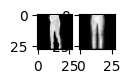

In [29]:
import random

i = random.randint(0, 32)

plt.figure(figsize=(1, 2))

img = outputs[0][1].detach().numpy()
recon = outputs[0][2].detach().numpy()

item = img[i].reshape(-1, 28, 28)
plt.subplot(1, 2, 1)
plt.imshow(item[0])

item = recon[i].reshape(-1, 28, 28)
plt.subplot(1, 2, 2)
plt.imshow(item[0])

In [31]:
torch.save(model.state_dict(), 'AE_fashion.pth')